In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import ephem

from matplotlib.image import pil_to_array
from PIL import Image
from datetime import datetime

def hard_sigmoid(x, s=10):
    return 1. / (1 + np.exp(-s * x))

NSIDE = 32
zen = ephem.Observer()
sun = ephem.Sun()
edi = ephem.city("Edinburgh")

i = np.arange(hp.nside2npix(NSIDE))
theta, phi = hp.pix2ang(NSIDE, i)
phi[phi > np.pi] -= 2 * np.pi

m = hard_sigmoid(np.pi/2 - theta)

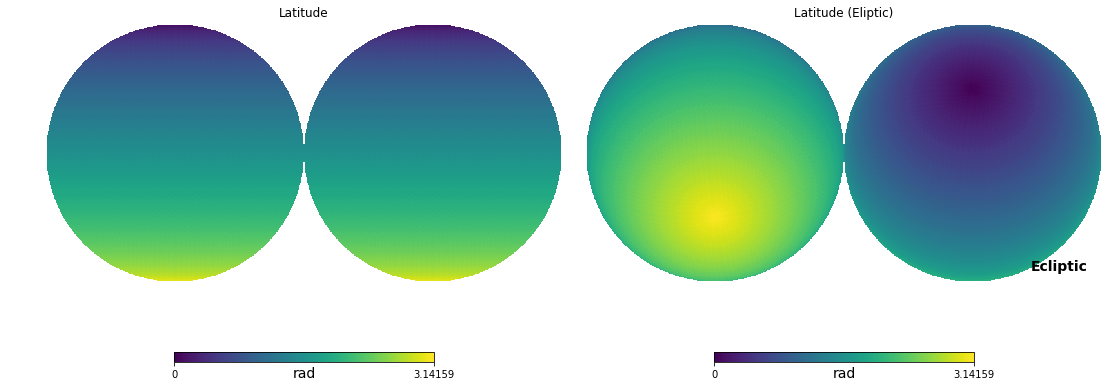

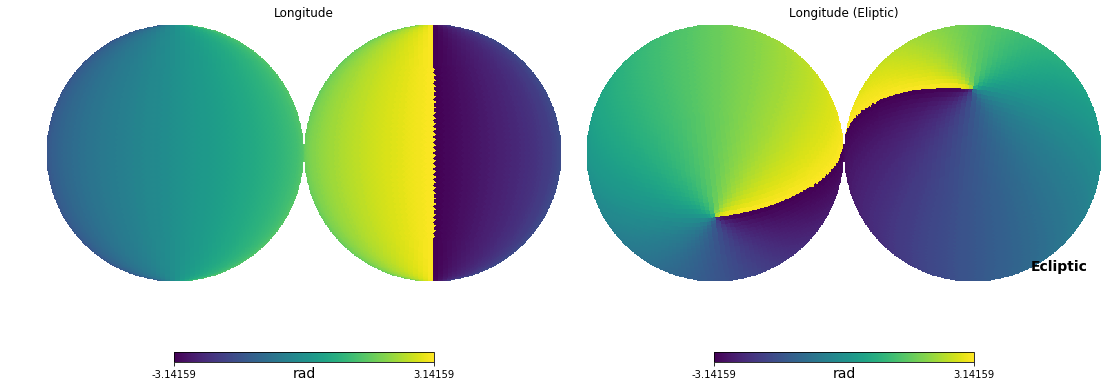

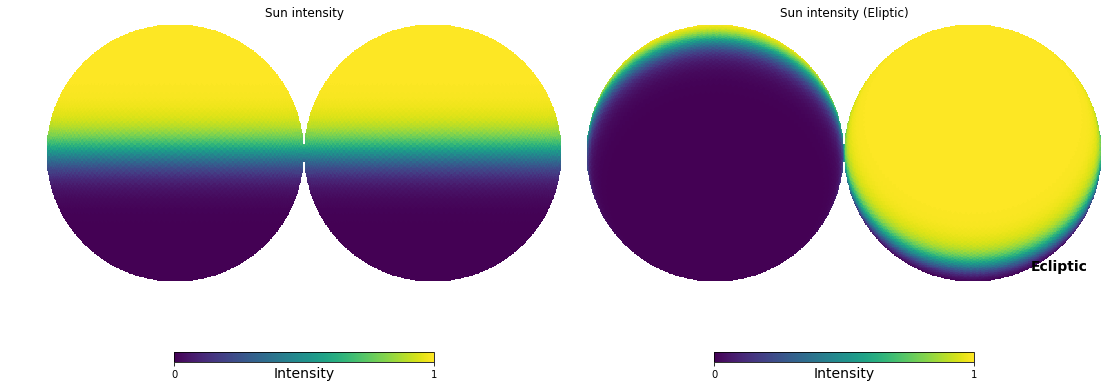

In [2]:
%matplotlib inline

plt.figure(1, figsize=(15, 20))
hp.orthview(theta, min=0, max=np.pi,title="Latitude", flip="geo",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(theta, min=0, max=np.pi,title="Latitude (Eliptic)", flip="geo", coord='ge',
               unit=r'rad', sub=(1,2,2), fig=1)

plt.figure(2, figsize=(15, 20))
hp.orthview(phi, min=-np.pi, max=np.pi, title="Longitude", flip="geo", 
           unit=r'rad', sub=(1,2,1), fig=2)
hp.orthview(phi, min=-np.pi, max=np.pi, title="Longitude (Eliptic)", flip="geo", coord='ge',
           unit=r'rad', sub=(1,2,2), fig=2)

plt.figure(3, figsize=(15, 20))
hp.orthview(m, min=0, max=1,title="Sun intensity", flip="geo",
               unit=r'Intensity', sub=(1,2,1), fig=3)
hp.orthview(m, min=0, max=1,title="Sun intensity (Eliptic)", flip="geo", coord='ge',
               unit=r'Intensity', sub=(1,2,2), fig=3)

In [3]:
def sun2lonlat(s, show=False):
    lon, lat = np.rad2deg(s.az), np.rad2deg(s.alt)
    if lon > 180.:
        lon -= 360.
    
    if show:
        print 'Sun:\tLon = %.2f\t Lat = %.2f' % (lon, lat)
        
    return lon, lat

Sun:	Lon = -3.37	 Lat = -10.56
Sun:	Lon = 10.60	 Lat = -10.03
Sun:	Lon = 24.28	 Lat = -7.49
Sun:	Lon = 37.41	 Lat = -1.95
Sun:	Lon = 49.89	 Lat = 2.82
Sun:	Lon = 61.84	 Lat = 9.61
Sun:	Lon = 73.53	 Lat = 17.33
Sun:	Lon = 85.37	 Lat = 25.55
Sun:	Lon = 97.96	 Lat = 33.92
Sun:	Lon = 112.11	 Lat = 42.01
Sun:	Lon = 128.91	 Lat = 49.23
Sun:	Lon = 149.49	 Lat = 54.73
Sun:	Lon = 173.79	 Lat = 57.38
Sun:	Lon = -160.93	 Lat = 56.44
Sun:	Lon = -138.39	 Lat = 52.18
Sun:	Lon = -119.86	 Lat = 45.67
Sun:	Lon = -104.58	 Lat = 37.91
Sun:	Lon = -91.35	 Lat = 29.62
Sun:	Lon = -79.23	 Lat = 21.28
Sun:	Lon = -67.53	 Lat = 13.27
Sun:	Lon = -55.75	 Lat = 5.96
Sun:	Lon = -43.55	 Lat = -0.01
Sun:	Lon = -30.74	 Lat = -5.37
Sun:	Lon = -17.30	 Lat = -9.05


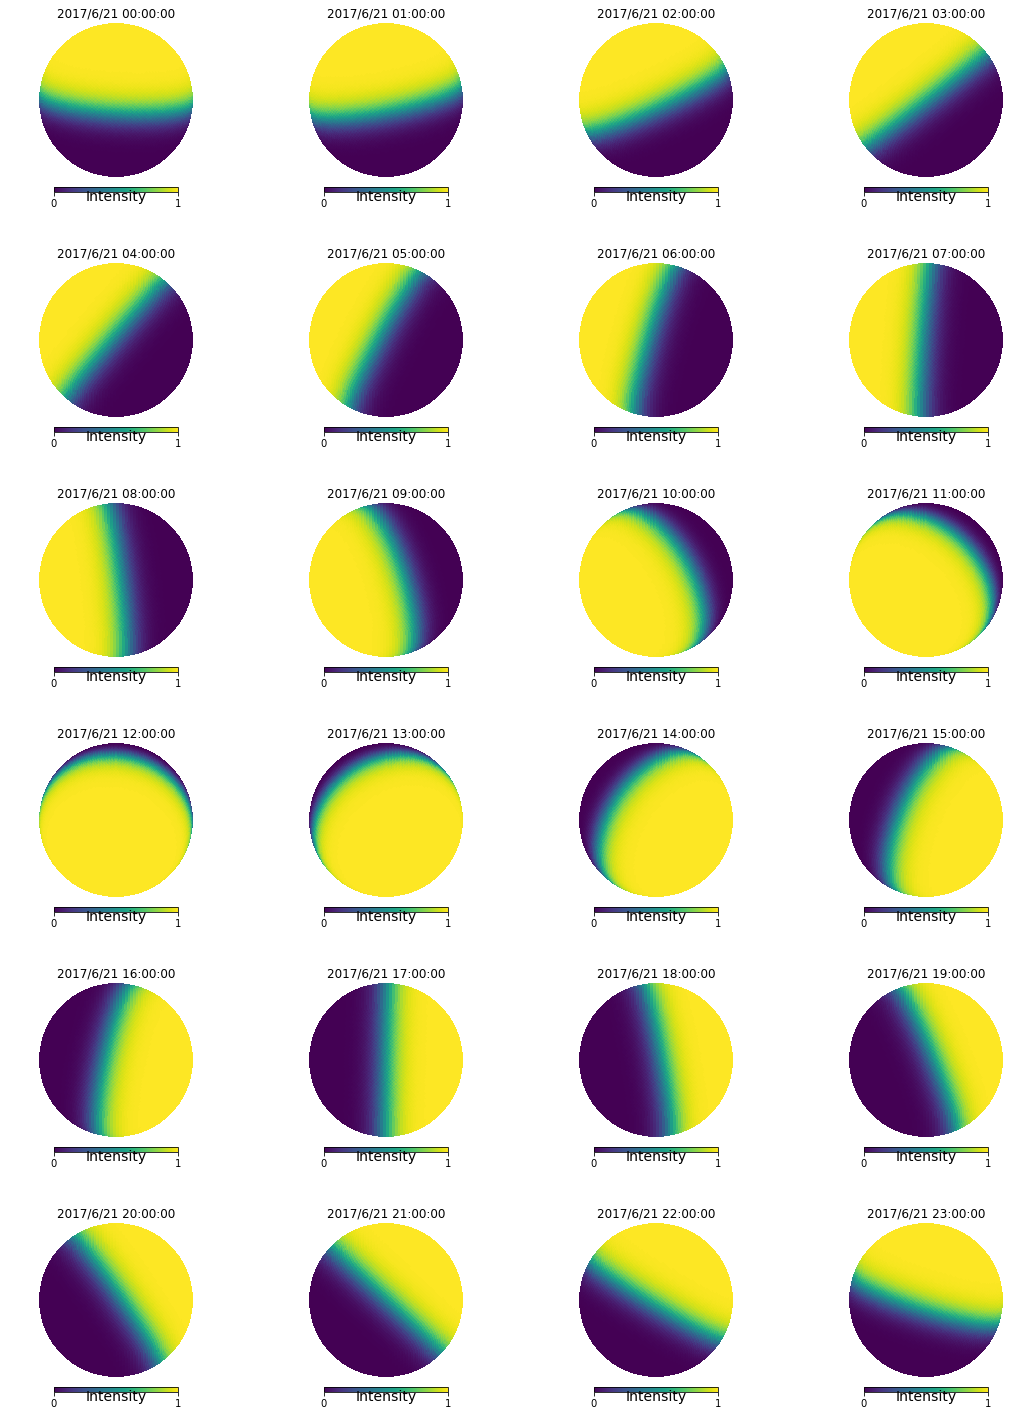

In [4]:
plt.figure(2, figsize=(15, 20))
for h in xrange(24):
    edi.date = datetime(2017, 6, 21, h, 0, 0)
    sun.compute(edi)
    
    lon, lat = sun2lonlat(sun, show=True)
    x, y, z = lon, lat, 0.

    rot_theta, rot_phi = hp.Rotator(rot=(z, y, x))(theta, phi)
#     rot_i = hp.ang2pix(NSIDE, rot_theta, rot_phi)
    
    m = hard_sigmoid(np.pi/2 - rot_theta)
    hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
                half_sky=True, title=str(edi.date),
                unit=r'Intensity', sub=(6,4,h+1), fig=1)
#     hp.mollview(m, min=0, max=1, title=str(edi.date), flip="geo",
#                unit=r'Intensity', sub=(6,4,h+1), fig=1)

Sun:	Lon = 128.91	 Lat = 49.23


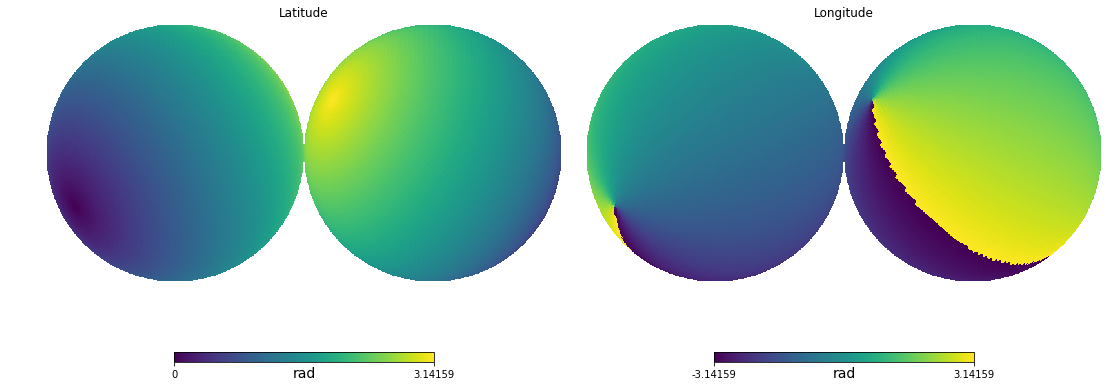

In [5]:
edi.date = datetime(2017, 6, 21, 10, 0, 0)
sun.compute(edi)

lon, lat = sun2lonlat(sun, show=True)
x, y, z = lon, lat, 0.

rot_theta, rot_phi = hp.Rotator(rot=(z, y, x))(theta, phi)
m = hard_sigmoid(np.pi/2 - rot_theta)

plt.figure(1, figsize=(15, 20))

hp.orthview(rot_theta, min=0, max=np.pi, title="Latitude", flip="geo", # coord="ge",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(rot_phi, min=-np.pi, max=np.pi, title="Longitude", flip="geo", # coord="ge",
           unit=r'rad', sub=(1,2,2), fig=1)

In [6]:
print "Theta", rot_theta.min(), rot_theta.max(), "Phi", rot_phi.min(), rot_phi.max()
print "Lat", np.deg2rad(lat), "Lon", np.deg2rad(lon) 

dist = hp.rotator.angdist([np.deg2rad(lat), np.deg2rad(lon)], [rot_theta, rot_phi])
print "Dist", np.rad2deg(dist.min()), np.rad2deg(dist.max())

deg = .75 * np.power(np.sin(rot_theta), 2) / (1. + np.power(np.cos(rot_theta), 2))
print "Deg.", deg.min(), deg.max()

Theta 0.0160892837336 3.12550336986 Phi -3.1415922897 3.14130976585
Lat 0.85925424099 Lon 2.24988126755
Dist 0.537732037864 179.462267962
Deg. 9.70785820894e-05 0.749999999469


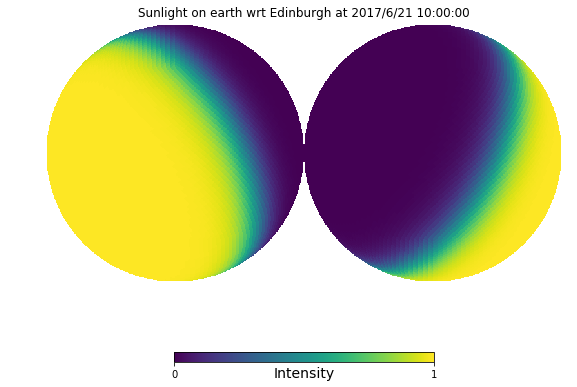

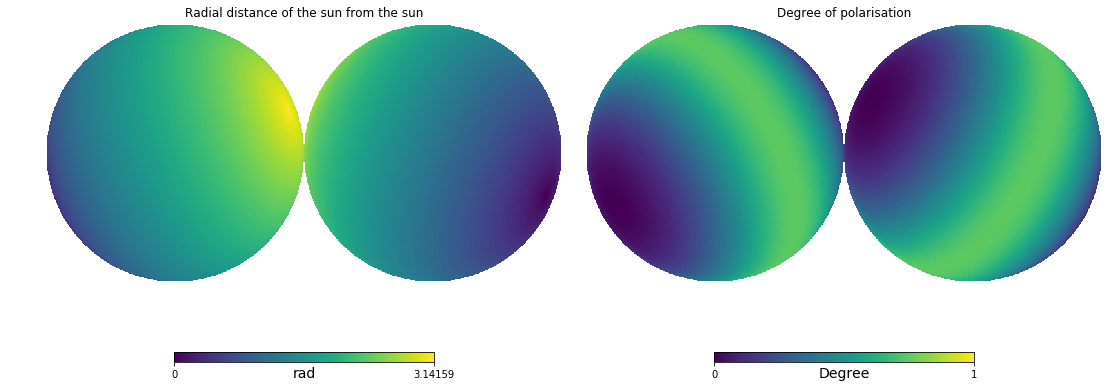

In [7]:
plt.figure(1, figsize=(15, 20))
hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
               title="Sunlight on earth wrt Edinburgh at %s" % str(edi.date),
               unit=r'Intensity', sub=(1,2,1), fig=1)

plt.figure(2, figsize=(15, 20))
hp.orthview(dist, min=0, max=np.pi, flip="geo", # coord="ge",
               title="Radial distance of the sun from the sun",
               unit=r'rad', sub=(1,2,1), fig=2)
hp.orthview(deg, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarisation",
               unit=r'Degree', sub=(1,2,2), fig=2)

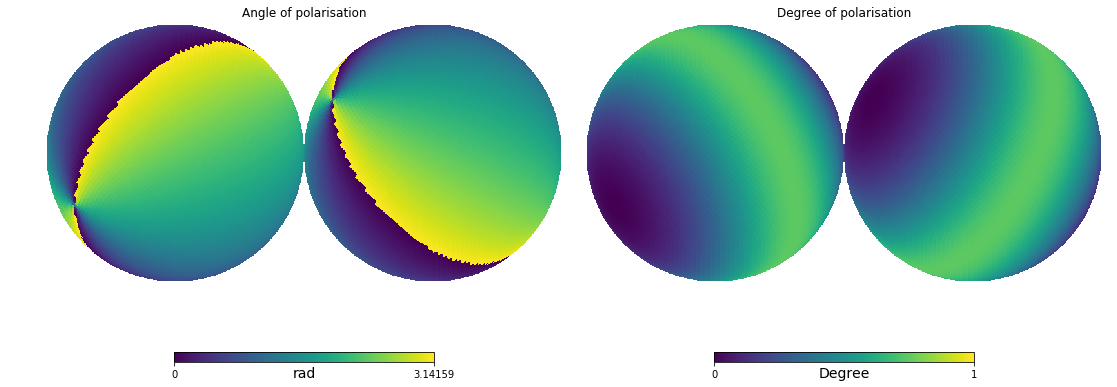

In [8]:
ang = rot_phi.copy() % np.pi

plt.figure(1, figsize=(15, 20))
hp.orthview(ang, min=0, max=np.pi, flip="geo", # coord="ge",
               title="Angle of polarisation",
               unit=r'rad', sub=(1,2,1), fig=1)
hp.orthview(deg, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarisation",
               unit=r'Degree', sub=(1,2,2), fig=1)

In [24]:
# Polarising Filters

def polarisation(lat, lon, filt=None):
    # centre
    Epar00 = np.clip(np.cos(lat), 0, 1)
    Eper00 = np.clip(np.sin(lat), 0, 1)
    
    if filt is not None:
        Eper00 = .5 * (np.absolute(np.sin(2 * (lon + filt) + 1) + 1))
    
    # 90 degrees
#     Epar90 = np.clip(np.cos(lat), 0, 1)
#     Eper90 = np.clip(np.sin(lon), 0, 1)
    
    return np.array([Epar00, Eper00])

# Unpolarized: filters out ½ the intensity of any incident light.
I0 = .5 * np.sqrt(np.power(1. - rot_theta / np.pi, 2) + .5 * np.power(rot_theta / np.pi, 2))
print "I0", I0.min(), I0.max()

I0par, I0per = polarisation(rot_theta, rot_phi)
I0 = .5 * (np.cos(rot_theta) * I0par + np.sin(rot_theta) * I0per) 

# I0_hor, I0_ver = polarisation(rot_theta, rot_phi)
# I0 = .5 * np.sqrt(I0_hor ** 2 + I0_ver ** 2)
I1par_hor, I1per_hor = polarisation(rot_theta, rot_phi, filt=0)
I1_hor = (np.cos(rot_theta) * I1par_hor + np.sin(rot_theta) * I1per_hor) * I0

I1par_ver, I1per_ver = polarisation(rot_theta, rot_phi, filt=np.pi/2)
I1_ver = (np.cos(rot_theta) * I1par_ver + np.sin(rot_theta) * I1per_ver) * I0
# I1_ver = np.mean(polarisation(rot_theta, rot_phi, filt=np.pi/2), axis=0)

# Linear: transmits only vertical and horizontal components
# I1_hor = .5 * (np.absolute(np.sin(2 * rot_phi) + 1) + 1) * I0
# I1_ver = .5 * (np.absolute(np.sin(2 * (rot_phi + np.pi/2)) + 1) + 1) * I0
# I1 = np.sqrt(I1_hor ** 2 + I1_ver ** 2)
# I1 = .5 * (np.sin(4 * (rot_phi + np.pi/2)) + 1.) * I0
# I1 = np.clip(I1_hor, 0, 1)
I1 = I0 * np.square(np.cos(rot_phi))
print "I1", I1.min(), I1.max()

# Linear: transmits only light polarized at +/- 45°

I2par_p45, I2per_p45 = polarisation(rot_theta, rot_phi, filt=np.pi/4)
I2_p45 = (np.cos(rot_theta) * I2par_p45 + np.sin(rot_theta) * I2per_p45) * I0

I2par_n45, I2per_n45 = polarisation(rot_theta, rot_phi, filt=-np.pi/4)
I2_n45 = (np.cos(rot_theta) * I2par_n45 + np.sin(rot_theta) * I2per_n45) * I0
# I2_p45 = .5 * (np.absolute(np.sin(2 * (rot_phi + np.pi/4)) + 1) + 1) * I0
# I2_n45 = .5 * (np.absolute(np.sin(2 * (rot_phi - np.pi/4)) + 1) + 1) * I0
# I2_p45 = .5 * (np.sin(2 * (rot_phi + np.pi/4)) + 1.) * I0
# I2_m45 = .5 * (np.sin(2 * (rot_phi - np.pi/4)) + 1.) * I0
# I2 = np.sqrt(I2_p45 ** 2 + I2_m45 ** 2)
# I2 = .5 * (np.sin(4 * (rot_phi + np.pi/4)) + 1.) * I0
# I2 = np.clip(I2_p45, 0, 1)
I2 = I0 * np.square(np.cos(rot_phi + np.pi/4))
print "I2", I2.min(), I2.max()

# Circular: transmits only R-polarized light (not implemented)
I3 = I0.copy()


# The Stokes Parameters

S = np.array([
    2 * I0,
    2 * I1 - 2 * I0,
    2 * I2 - 2 * I0,
    2 * I3 - 2 * I0
])
# S[1:] = S[1:] / np.linalg.norm(S[1:], axis=0)

print "S0", S[0].min(), S[0].max()
print "S1", S[1].min(), S[1].max()
print "S2", S[2].min(), S[2].max()
print "S3", S[3].min(), S[3].max()

I0 0.288675134685 0.497442606393
I1 1.15354454357e-08 0.5
I2 3.928548782e-09 0.499999971573
S0 0.000258842714793 1.0
S1 -0.999999969024 -6.73905375947e-14
S2 -0.999999988327 -5.42044602536e-08
S3 0.0 0.0


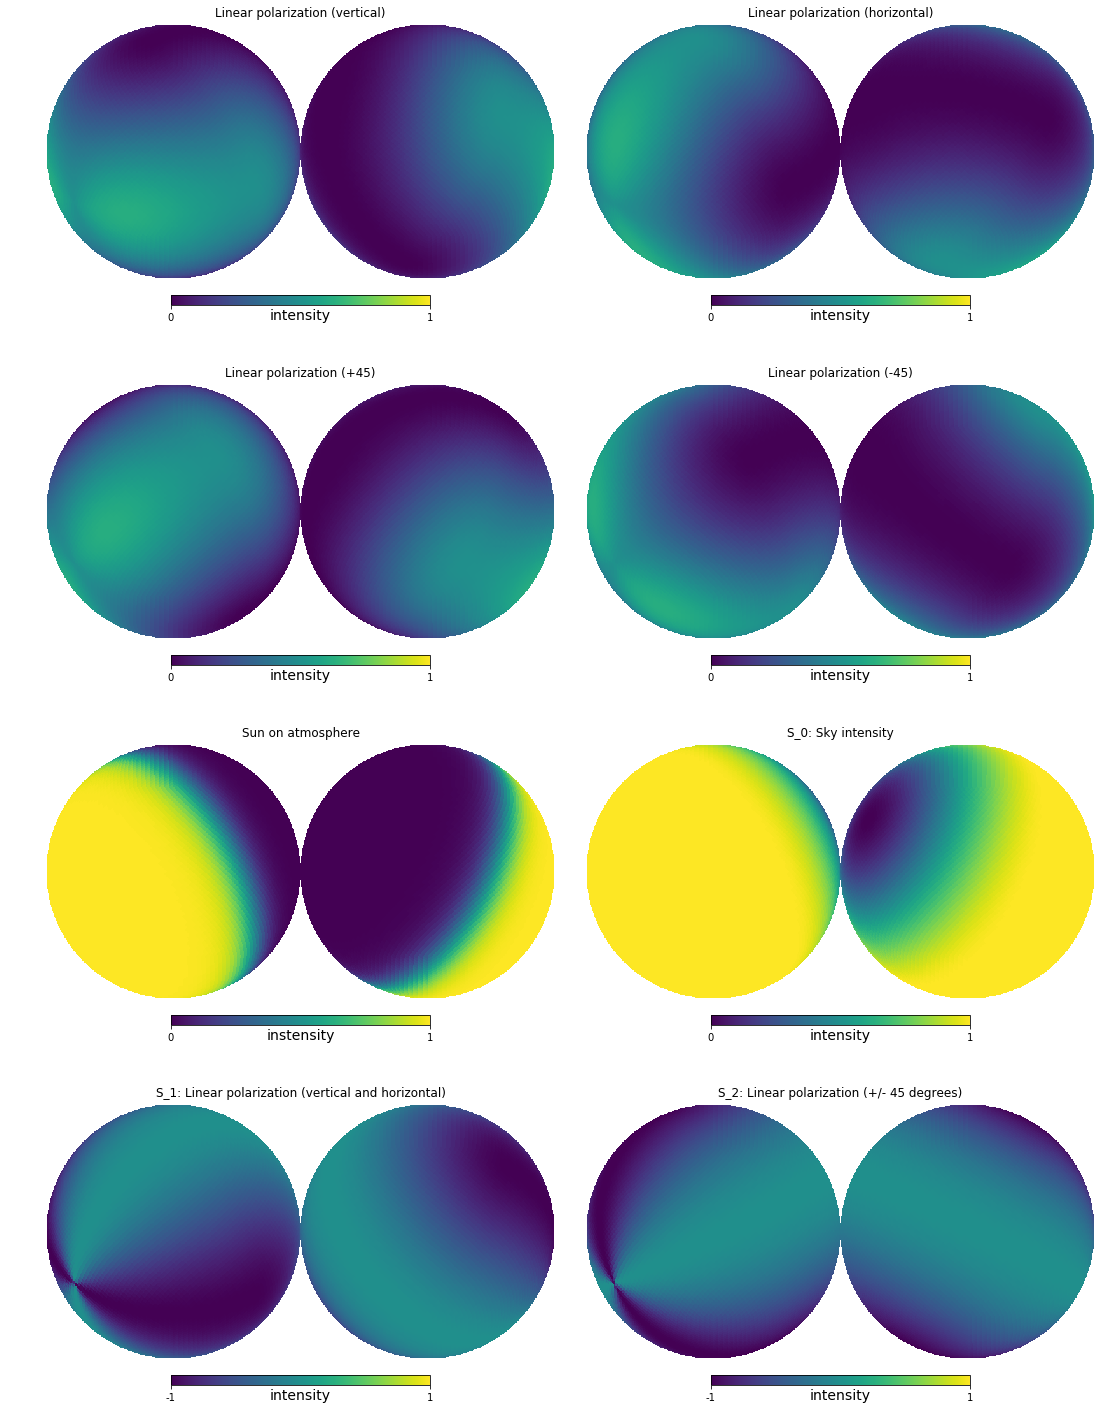

In [25]:
plt.figure(1, figsize=(15, 20))
hp.orthview(I1_ver, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (vertical)",
               unit=r'intensity', sub=(4,2,1), fig=1)
hp.orthview(I1_hor, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (horizontal)",
               unit=r'intensity', sub=(4,2,2), fig=1)
hp.orthview(I2_p45, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (+45)",
               unit=r'intensity', sub=(4,2,3), fig=1)
hp.orthview(I2_n45, min=0, max=1, flip="geo", # coord="ge",
               title="Linear polarization (-45)",
               unit=r'intensity', sub=(4,2,4), fig=1)
hp.orthview(m, min=0, max=1, flip="geo", # coord="ge",
               title="Sun on atmosphere",
               unit=r'instensity', sub=(4,2,5), fig=1)
hp.orthview(S[0], min=0, max=1, flip="geo", # coord="ge",
               title="S_0: Sky intensity",
               unit=r'intensity', sub=(4,2,6), fig=1)
hp.orthview(S[1], min=-1, max=1, flip="geo", # coord="ge",
               title="S_1: Linear polarization (vertical and horizontal)",
               unit=r'intensity', sub=(4,2,7), fig=1)
hp.orthview(S[2], min=-1, max=1, flip="geo", # coord="ge",
               title="S_2: Linear polarization (+/- 45 degrees)",
               unit=r'intensity', sub=(4,2,8), fig=1)

In [26]:
I, Q, U, V = S

# Degree of polarisation
P = np.sqrt(Q ** 2 + U ** 2 + V ** 2) / I
print P.min(), P.max()

# Degree of linear polarization
LP = np.sqrt(Q ** 2 + U ** 2) / I
print LP.min(), LP.max()

0.207106932419 1.20710678117
0.207106932419 1.20710678117


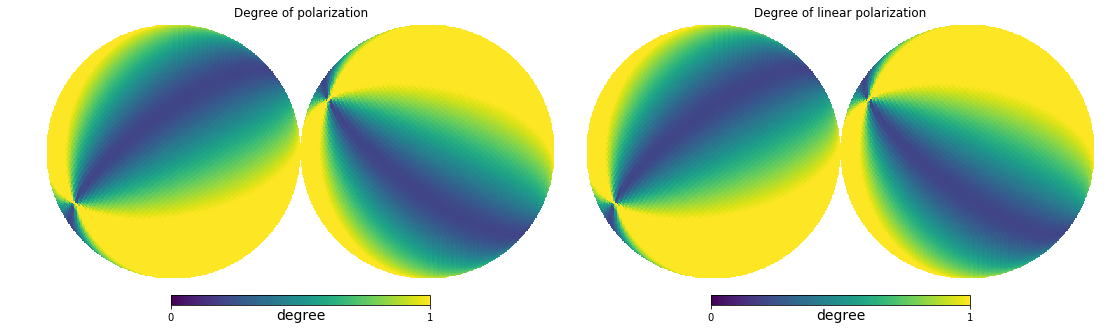

In [29]:
plt.figure(1, figsize=(15, 20))
hp.orthview(P, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of polarization",
               unit=r'degree', sub=(4,2,1), fig=1)
hp.orthview(LP, min=0, max=1, flip="geo", # coord="ge",
               title="Degree of linear polarization",
               unit=r'degree', sub=(4,2,2), fig=1)

In [ ]:
i_sun = np.argmin(rot_theta)

# intensity wrt the sun
s = hard_sigmoid(np.pi/2 - theta) * (1 - theta[i_sun] / np.pi)

# rayleigh scattering

## red
r_scat = .5 * np.sin(theta) ** 2 / (1 + np.cos(theta) ** 2) + .4
## green
g_scat = .3 * np.sin(theta) ** 2 / (1 + np.cos(theta) ** 2) + .6
## blue
b_scat = .1 * np.sin(theta) ** 2 / (1 + np.cos(theta) ** 2) + .8
rgb = np.concatenate([r_scat[np.newaxis], g_scat[np.newaxis], b_scat[np.newaxis]], axis=0)

## intensity wrt scattering
rgb_scat = np.mean(rgb, axis=0)

## parallel to the surface
E1_r = s * rgb_scat
E2_r = s * rgb_scat * (1 - .8 * np.sin(rot_theta) ** 2 / (1 + np.cos(rot_theta) ** 2))
print "E1_r", E1_r.min(), E1_r.max()
print "E2_r", E2_r.min(), E2_r.max()
E1_a, E2_a = rot_phi + 0, rot_phi + np.pi / 2
print "E1_a", E1_a.min(), E1_a.max()
print "E2_a", E2_a.min(), E2_a.max()
E1 = E1_r * (np.cos(E1_a) + 1j * np.sin(E1_a))
E2 = E2_r * (np.cos(E2_a) + 1j * np.sin(E2_a))
E = .5 * E1 + .5 * E2
# E = s * rgb_scat * (1 + (1 - .75 * np.sin(rot_theta) ** 2 / (1 + np.cos(rot_theta) ** 2)) * 1j)
sun_intensity = np.absolute(E)

# Polarisation
ang = (rot_phi + np.pi/2) % (2 * np.pi)   # rough approximation
deg = .75 * np.sin(rot_theta) ** 2 / (1 + np.cos(rot_theta) ** 2) # rough approximation

## Stokes Parameters

### Intensity
I0 = .5 * np.absolute(E)
print "I0", I0.min(), I0.max()

### Linear 0 deg
# a = E1_a + 0
# E_lh00 = I0.real * (np.cos(a) + np.sin(a) * 1.j) # + I0.imag * (np.sin(a) + np.cos(a) * 1.j)
# a = E1_a + np.pi/2
# E_lv00 = I0.real * (np.cos(a) + np.sin(a) * 1.j) + I0.imag * (np.sin(a) + np.cos(a) * 1.j)
# E_l00 = E_lh00 # .5 * E_lh00 + .5 * E_lv00
# I1 = .5 * E_l00
E1_hor = .5 * E1_r * np.cos(E1_a)
E2_hor = .5 * E2_r * np.cos(E2_a)
E1_ver = .5 * E1_r * np.sin(E1_a)
E2_ver = .5 * E2_r * np.sin(E2_a)
# I1 = .5 * np.abs(np.array([E1_hor, E2_hor, E1_ver, E2_ver])).mean(axis=0)
# I1 = .5 * np.sqrt(np.square(E1_hor + E2_ver) + np.square(E2_hor + E1_ver))
I1 = .5 * np.sqrt(np.square(E1_hor + E1_ver) + np.square(E2_hor + E2_ver))
print "I1", I1.min(), I1.max()

### Linear 45 deg
# a = E1_a + np.pi/4
# E_lp45 = I0.real * (np.cos(a) + np.sin(a) * 1.j) # + I0.imag * (np.sin(a) + np.cos(a) * 1.j)
# a = E1_a - np.pi/4
# E_ln45 = I0.real * (np.cos(a) + np.sin(a) * 1.j) + I0.imag * (np.sin(a) + np.cos(a) * 1.j)
# E_l45 = E_lp45 # .5 * E_lp45 + .5 * E_ln45
# I2 = .5 * E_l45
E1_p45 = .5 * E1_r * np.cos(E1_a + np.pi/4)
E2_p45 = .5 * E2_r * np.cos(E2_a + np.pi/4)
E1_n45 = .5 * E1_r * np.sin(E1_a + np.pi/4)
E2_n45 = .5 * E2_r * np.sin(E2_a + np.pi/4)
# I2 = .5 * np.abs(np.array([E1_p45, E2_p45, E1_n45, E2_n45])).mean(axis=0)
# I2 = .25 * np.sqrt(np.square(E1_p45 + E2_n45) + np.square(E2_p45 + E1_n45))
I2 = .5 * np.sqrt(np.square(E1_p45 + E1_n45) + np.square(E2_p45 + E2_n45))
print "I2", I2.min(), I2.max()

### Circular
I3 = I0.copy()

S = [
    2 * (I0),
    2 * (I1 - I0),
    2 * (I2 - I0),
    2 * (I3 - I0)
]
I, Q, U, V = S

# ## Alternative implementation
# E11 = E1
# E22 = E2

# ### I = <E1 * E1^ + E2 * E2^>
# I = np.absolute( E11 * E11.conj() + E22 * E22.conj())
# #### Q = <E1 * E1^ - E2 * E2^>
# Q = np.absolute( E11 * E11.conj() - E22 * E22.conj())
# #### U = <E1 * E2^ + E2 * E1^>
# U = np.absolute( E11 * E22.conj() + E22 * E11.conj())
# #### V = i<E1 * E2^ - E2 * E1^>
# V = np.absolute((E11 * E22.conj() - E22 * E11.conj()) * 1j)

print "I", I.min(), I.max()
print "Q", Q.min(), Q.max()
print "U", U.min(), U.max()
print "V", V.min(), V.max()

# assert np.all(I ** 2 >= (Q ** 2 + U ** 2 + V ** 2)), "Not Valid Stroke Parameters!"

In [27]:
## Degree of linear polarisation
LP = np.sqrt(Q ** 2 + U ** 2) / I
print "LP", LP.min(), LP.max()

## Degree of circular polarisation
CP = V / I
print "CP", CP.min(), CP.max()

## Angle of polarisation
xu = .5 * np.arctan2(U, Q) % np.pi
print "xu", xu.min(), xu.max()

LP 0.207106932419 1.20710678117
CP 0.0 0.0
xu 1.57079638362 2.35619449019


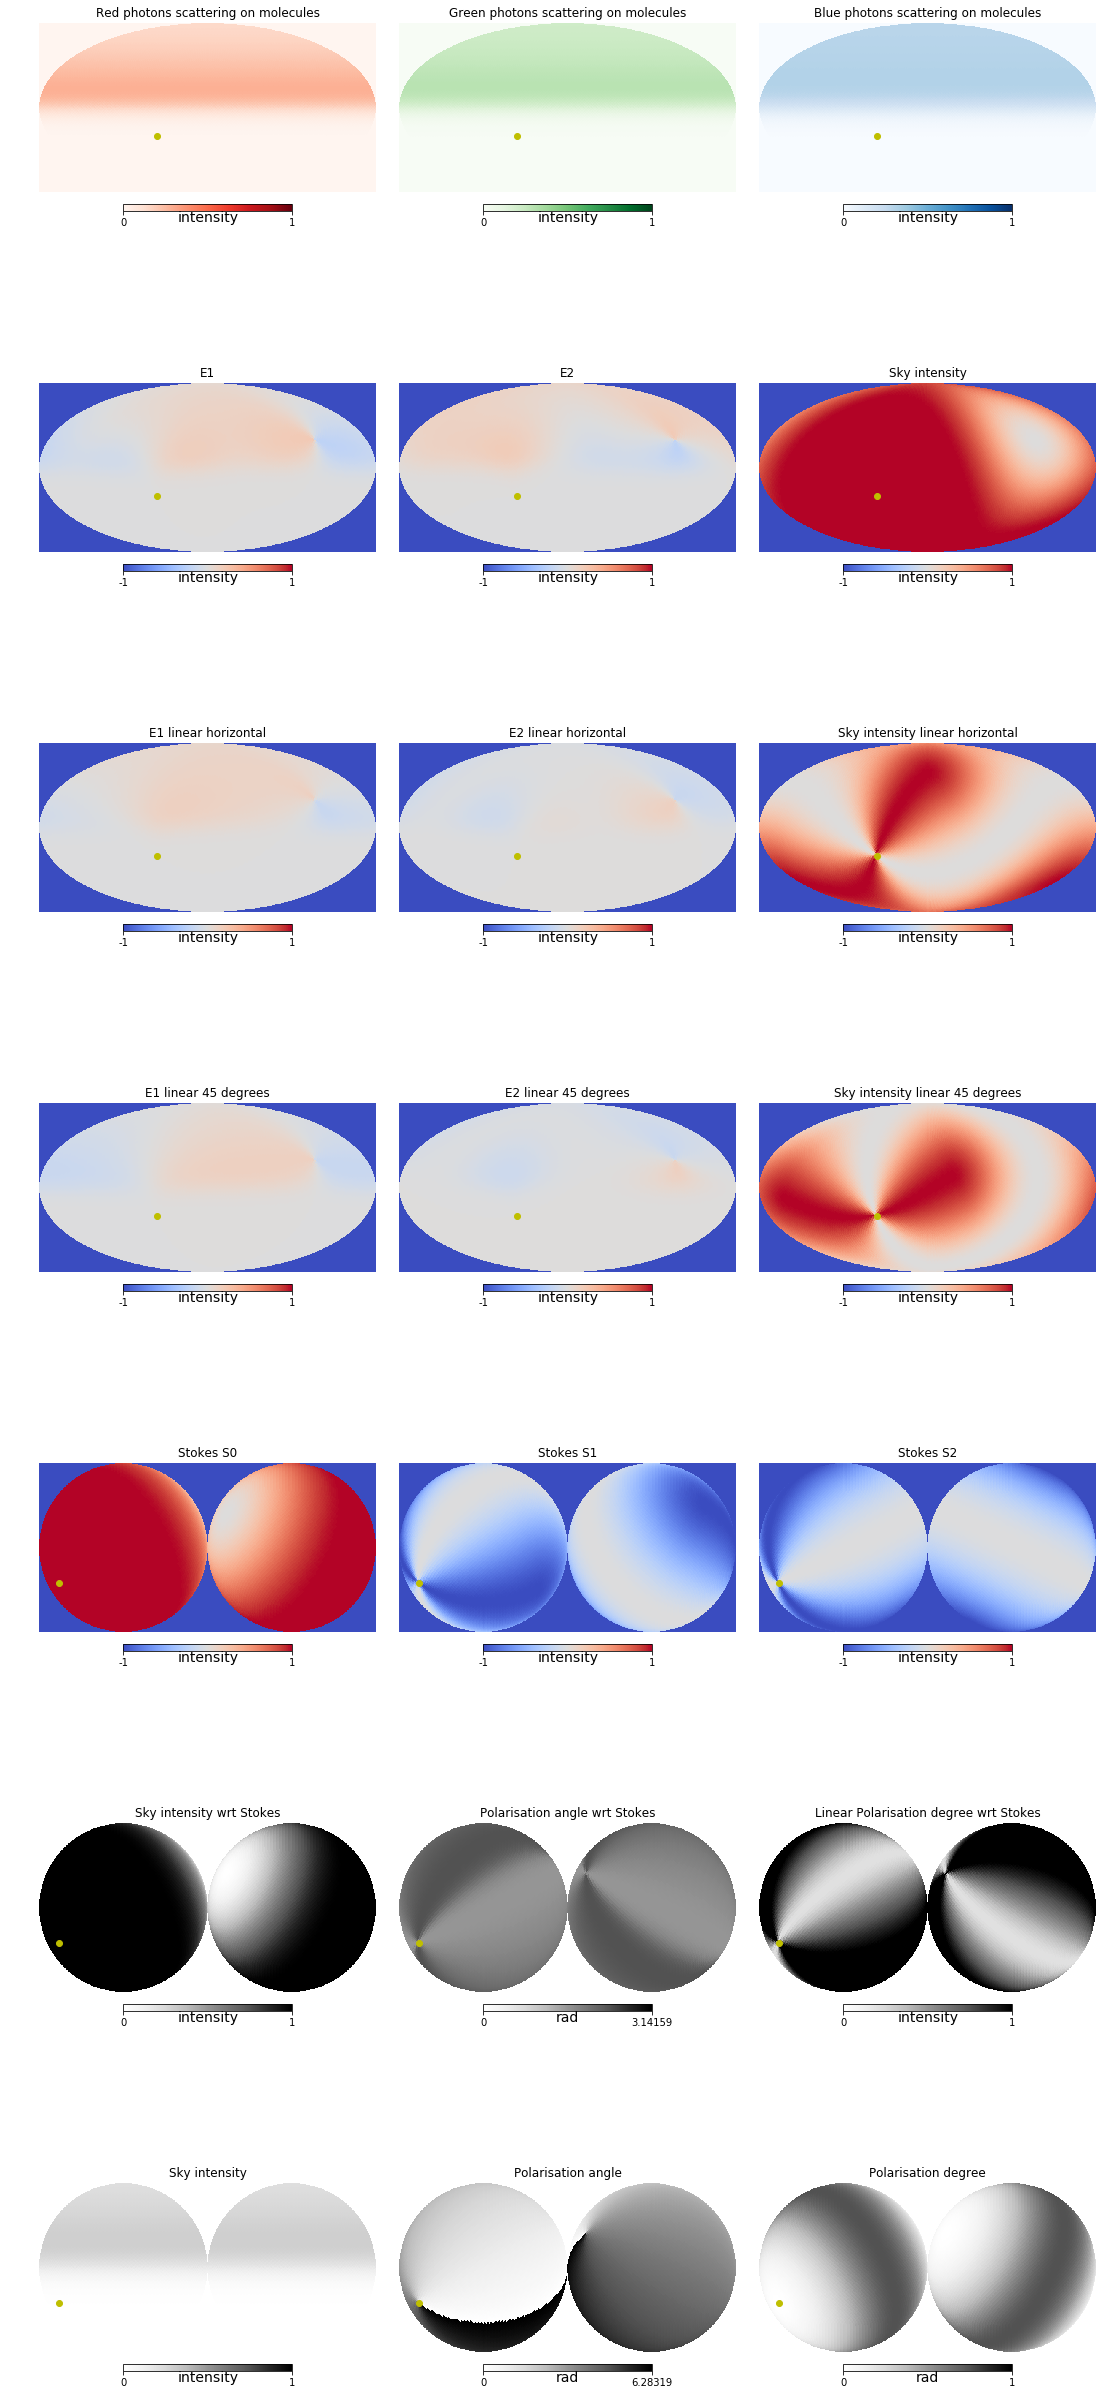

In [28]:
# Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r,
# CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r,
# Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG,
# PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r,
# RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2,
# Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r,
# Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r,
# afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r,
# coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r,
# gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r,
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r,
# hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r,
# ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r,
# spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r,
# winter, winter_r
plt.figure(1, figsize=(15, 50))
hp.mollview(s * r_scat, min=0, max=1, flip="geo", cmap="Reds", # coord="ge",
               title="Red photons scattering on molecules",
               unit=r'intensity', sub=(10,3,1), fig=1)
hp.mollview(s * g_scat, min=0, max=1, flip="geo", cmap="Greens", # coord="ge",
               title="Green photons scattering on molecules",
               unit=r'intensity', sub=(10,3,2), fig=1)
hp.mollview(s * b_scat, min=0, max=1, flip="geo", cmap="Blues", # coord="ge",
               title="Blue photons scattering on molecules",
               unit=r'intensity', sub=(10,3,3), fig=1)

hp.mollview(E.real, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E1",
               unit=r'intensity', sub=(10,3,4), fig=1)
hp.mollview(E.imag, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E2",
               unit=r'intensity', sub=(10,3,5), fig=1)
hp.mollview(np.absolute(2 * I0), min=-1, max=1, flip="geo", cmap="coolwarm",  # coord="ge",
               title="Sky intensity",
               unit=r'intensity', sub=(10,3,6), fig=1)

hp.mollview(E1_hor, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E1 linear horizontal",
               unit=r'intensity', sub=(10,3,7), fig=1)
hp.mollview(E2_hor, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E2 linear horizontal",
               unit=r'intensity', sub=(10,3,8), fig=1)
hp.mollview(np.absolute(2 * I1), min=-1, max=1, flip="geo", cmap="coolwarm",  # coord="ge",
               title="Sky intensity linear horizontal",
               unit=r'intensity', sub=(10,3,9), fig=1)

hp.mollview(E1_p45, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E1 linear 45 degrees",
               unit=r'intensity', sub=(10,3,10), fig=1)
hp.mollview(E2_p45, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="E2 linear 45 degrees",
               unit=r'intensity', sub=(10,3,11), fig=1)
hp.mollview(np.absolute(2 * I2), min=-1, max=1, flip="geo", cmap="coolwarm",  # coord="ge",
               title="Sky intensity linear 45 degrees",
               unit=r'intensity', sub=(10,3,12), fig=1)

hp.orthview(I, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="Stokes S0",
               unit=r'intensity', sub=(10,3,13), fig=1)
hp.orthview(Q, min=-1, max=1, flip="geo", cmap="coolwarm", # coord="ge",
               title="Stokes S1",
               unit=r'intensity', sub=(10,3,14), fig=1)
hp.orthview(U, min=-1, max=1, flip="geo", cmap="coolwarm",  # coord="ge",
               title="Stokes S2",
               unit=r'intensity', sub=(10,3,15), fig=1)

hp.orthview(I, min=0, max=1, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Sky intensity wrt Stokes",
               unit=r'intensity', sub=(10,3,16), fig=1)
hp.orthview(xu, min=0, max=np.pi, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Polarisation angle wrt Stokes",
               unit=r'rad', sub=(10,3,17), fig=1)
hp.orthview(LP, min=0, max=1, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Linear Polarisation degree wrt Stokes",
               unit=r'intensity', sub=(10,3,18), fig=1)

hp.orthview(s * rgb_scat, min=0, max=1, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Sky intensity",
               unit=r'intensity', sub=(10,3,19), fig=1)
hp.orthview(ang, min=0, max=2*np.pi, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Polarisation angle",
               unit=r'rad', sub=(10,3,20), fig=1)
hp.orthview(deg, min=0, max=1, flip="geo", cmap="Greys", # cmap="gist_earth_r", # coord="ge",
               title="Polarisation degree",
               unit=r'rad', sub=(10,3,21), fig=1)
hp.projplot(theta[i_sun], phi[i_sun], 'yo')